## 题目：

处理数据，按照不同频率分组计算静压、动压、转速、功率的平均值，并根据动压计算出对应频率下的流量。最后绘制功率P－流量q曲线图。

基本步骤：

* 提取数据

* 处理数据

* 绘制曲线

### 1.从txt文件中读取数据，并将其按频率的不同划分成4个数组，并按照要求return。

In [63]:
from prettytable import PrettyTable
import math
from  statistics import mean
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

data=[]
P=[]
q=[]
k=[]
lfit=[]

def getData(i):
    dataFile=open('data1.txt','r')
    f1={'p-sit':[],'co':[],'p-mov':[],'r':[],'P':[]}
    f2={'p-sit':[],'co':[],'p-mov':[],'r':[],'P':[]}
    f3={'p-sit':[],'co':[],'p-mov':[],'r':[],'P':[]}
    f4={'p-sit':[],'co':[],'p-mov':[],'r':[],'P':[]}
    for line in dataFile:
        psit,co,pmov,r,P,f=line.strip().split(" ")
        if float(psit)>0 and float(co)>0:
            if float(f)==50:
                f1['p-sit'].append(float(psit))
                f1['co'].append(float(co))
                f1['p-mov'].append(float(pmov))
                f1['r'].append(float(r))
                f1['P'].append(float(P))
            if float(f)==45:
                f2['p-sit'].append(float(psit))
                f2['co'].append(float(co))
                f2['p-mov'].append(float(pmov))
                f2['r'].append(float(r))
                f2['P'].append(float(P))
            if float(f)==40:
                f3['p-sit'].append(float(psit))
                f3['co'].append(float(co))
                f3['p-mov'].append(float(pmov))
                f3['r'].append(float(r))
                f3['P'].append(float(P))
            if float(f)==35:
                f4['p-sit'].append(float(psit))
                f4['co'].append(float(co))
                f4['p-mov'].append(float(pmov))
                f4['r'].append(float(r))
                f4['P'].append(float(P))
    if i==0:
        return f1
    if i==1:
        return f2
    if i==2:
        return f3
    if i==3:
        return f4

### 2.分别对不同频率下数据进行处理并计算平均值。最后用prettytable显示。

In [64]:
def satData(psit,pmov,co,r,P):
    data={'pinlv':None,'jingya':None,'p1':None,'p2':None,'p3':None,'p4':None,'zhuan':None,'gonglv':None,'q':None}
    pmov1=[]
    pmov2=[]
    pmov3=[]
    pmov4=[]
    data['jingya']=mean(psit)
    for i in range(len(co)):
        if co[i]==25:
            pmov1.append(pmov[i])
        if co[i]==50:        
            pmov2.append(pmov[i])
        if co[i]==75:
            pmov3.append(pmov[i])
        if co[i]==100:        
            pmov4.append(pmov[i])
    data['zhuan']=mean(r)
    data['gonglv']=mean(P)
    data['p1']=mean(pmov1)
    data['p2']=mean(pmov2)
    data['p3']=mean(pmov3)
    data['p4']=mean(pmov4)
    data['q']=7.54*10**(-3)*1.4*(mean(pmov)*1000/1.15)**0.5#根据每一频率动压平均值计算流量
    return data

def workData(i):
    f=getData(i)
    data=satData(f['p-sit'], f['p-mov'], f['co'], f['r'], f['P'])
    return data

def giveData():
    for i in range(4):
        data1=workData(i)
        data.append(data1)
        P.append(data1['gonglv'])
        q.append(data1['q'])
        k1=data1['gonglv']/(data1['q']**2)
        k.append(k1)#将斜率输出

def table():
    table=PrettyTable(["status","p-sit","p-mov(1)","p-mov(2)","p-mov(3)","p-mov(4)","rotation","power","q"])
    table.align="r"
    table.paddding_width=1
    for i in range(4):
        table.add_row([i+1,
                       "%.3f" % data[i]['jingya'],
                       "%.3f" % data[i]['p1'],"%.3f" % data[i]['p2'],
                       "%.3f" % data[i]['p3'],"%.3f" % data[i]['p4'],
                       "%.3f" % data[i]['zhuan'],"%.3f" % data[i]['gonglv'],
                       "%.3f" % data[i]['q']])
    print(table)

### 3. 绘制P-qv曲线。

In [65]:
def workData(i):
    f=getData(i)
    data=satData(f['p-sit'], f['p-mov'], f['co'], f['r'], f['P'])
    return data

def giveData():
    for i in range(4):
        data1=workData(i)
        data.append(data1)
        P.append(data1['gonglv'])
        q.append(data1['q'])
        k1=data1['gonglv']/(data1['q']**2)
        k.append(k1)

def table():
    table=PrettyTable(["status","p-sit","p-mov(1)","p-mov(2)","p-mov(3)","p-mov(4)","rotation","power","q"])
    table.align="r"
    table.paddding_width=1
    for i in range(4):
        table.add_row([i+1,
                       "%.3f" % data[i]['jingya'],
                       "%.3f" % data[i]['p1'],"%.3f" % data[i]['p2'],
                       "%.3f" % data[i]['p3'],"%.3f" % data[i]['p4'],
                       "%.3f" % data[i]['zhuan'],"%.3f" % data[i]['gonglv'],
                       "%.3f" % data[i]['q']])
    print(table)

def fitData():
    k1=mean(k)
    q=np.linspace(0,0.2,5)
    P=np.square(q)*k1
    qnew=np.linspace(0,0.2,10)
    f=interpolate.interp1d(q,P,kind='quadratic') 
    Pnew=f(qnew)
    return Pnew,qnew

def plotData(q,P,Pnew,qnew):
    plt.title(u"开度为4的管路计算曲线")
    plt.xlabel('q')
    plt.ylabel('P')
    
    plt.plot(q,P,'bo',
             label=u"开度为4的管路实验点")
        
    plt.plot(qnew,Pnew,
             label=u"开度为4的管路计算曲线")
    plt.legend(loc='best')

def processing_data():
    qnew,Pnew=fitData()
    lfit.append({'qnew':qnew,'Pnew':Pnew})

def processing_plot():
    plt.rcParams['font.family'] = 'SimHei'
    fig=plt.figure(figsize=(12.0,8.0))
    fig.subplots_adjust(left=0.1,right=0.9,bottom=0.1,top=0.95)
    fig.add_subplot(1,1,1)
    plotData(q,P,lfit[0]['qnew'],lfit[0]['Pnew'])
    plt.show()

+--------+-------+----------+----------+----------+----------+----------+-------+-------+
| status | p-sit | p-mov(1) | p-mov(2) | p-mov(3) | p-mov(4) | rotation | power |     q |
+--------+-------+----------+----------+----------+----------+----------+-------+-------+
|      1 | 0.016 |    0.327 |    0.367 |    0.334 |    0.264 | 2966.300 | 0.910 | 0.180 |
|      2 | 0.024 |    0.283 |    0.285 |    0.290 |    0.212 | 2662.958 | 0.752 | 0.161 |
|      3 | 0.012 |    0.213 |    0.220 |    0.385 |    0.167 | 2358.368 | 0.700 | 0.157 |
|      4 | 0.015 |    0.164 |    0.171 |    0.186 |    0.130 | 2060.263 | 0.605 | 0.124 |
+--------+-------+----------+----------+----------+----------+----------+-------+-------+


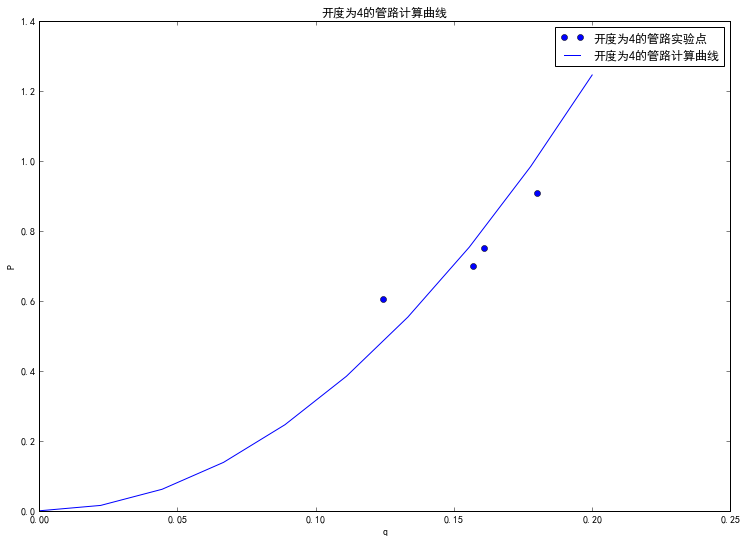

In [66]:
# -*- coding: UTF-8 -*-
%matplotlib inline

giveData()
table()
processing_data()
processing_plot()